In [160]:
import random
import numpy as np
import innvestigate
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_gru_list_tuning.pkl", "rb") as f:
    cnn_gru_tuning = pickle.load(f)

In [3]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_lstm_list_tuning.pkl", "rb") as f:
    cnn_lstm_tuning = pickle.load(f)

In [4]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_list_tuning.pkl", "rb") as f:
    cnn_attention_gru_tuning = pickle.load(f)

In [5]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\standard_scaler.pkl", "rb") as f:
    standard_scaler = pickle.load(f)

In [6]:
standard_scaler

StandardScaler()

In [7]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\X_resampling.pkl", "rb") as f:
    X_resampling = pickle.load(f)

In [8]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\y_resampling.pkl", "rb") as f:
    y_resampling = pickle.load(f)

In [170]:
X_resampling = standard_scaler.transform(X_resampling)

In [180]:
def XAI_pred(model, random_number):
    print("Data number: ", random_number)
    print("Real Label: ", y_resampling[random_number])

    pred = model.predict(X_resampling[random_number].reshape(1, 24, 1))
    prediction = np.argmax(pred)
    print("Prediction: ", prediction)
    
    analyzer = innvestigate.create_analyzer('input', model)
    relevance = analyzer.analyze(X_resampling[random_number].reshape(1, 24, 1))

    # Ubah ndarray menjadi list
    relevance_list = relevance.squeeze().tolist()

    # Urutkan list secara menurun
    sorted_relevance = sorted(enumerate(relevance_list), key=lambda x: x[1], reverse=True)

    # Ambil elemen pertama setelah diurutkan
    top_relevance = sorted_relevance[:25]

    # Buat dictionary dari hasil urutan dengan indeks sebagai kunci dan nilai sebagai nilai
    top_dict = {index: value for index, value in top_relevance}

    print(top_dict)

    total_relevance = sum(top_dict.values())
    print("Total relevance:", total_relevance)

    # Filter nilai yang di atas 0.0 dan ambil indeksnya
    filtered_indices = [index for index, value in enumerate(relevance_list) if value > 0.0]

    print(filtered_indices)
    
    relevance_resized = np.resize(relevance, (1, 24, 1))

    plt.figure(figsize=(20, 5))
    plt.imshow(relevance_resized, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [181]:
random_number = np.random.randint(0, len(X_resampling))

Model Number:  1
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 26ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


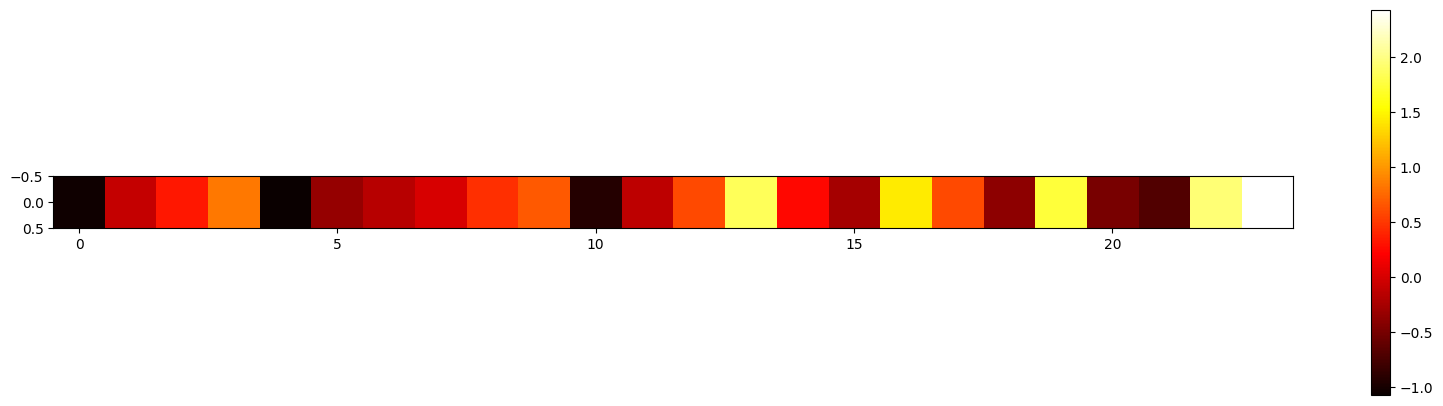

Model Number:  2
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 26ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


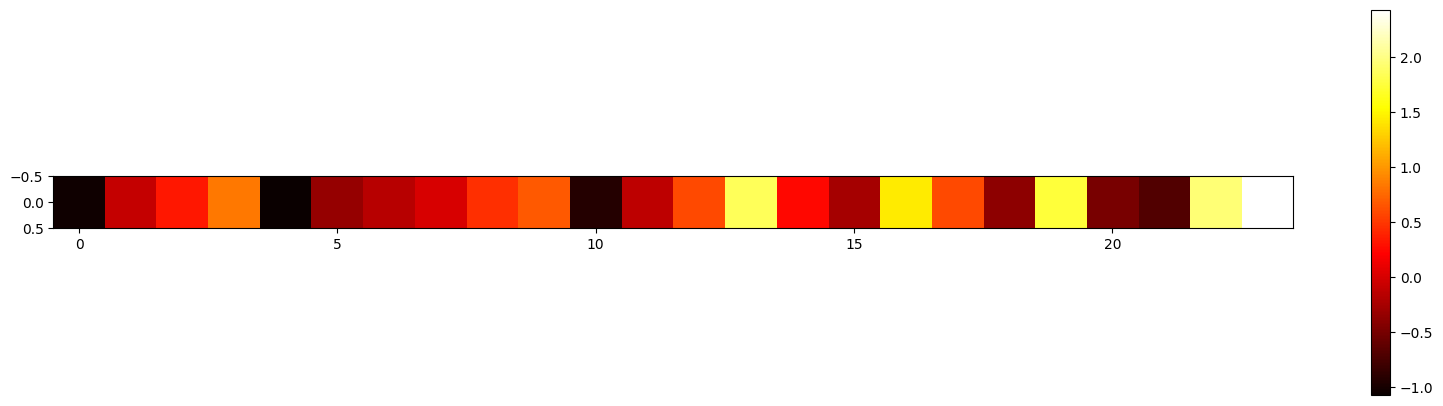

Model Number:  3
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 21ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


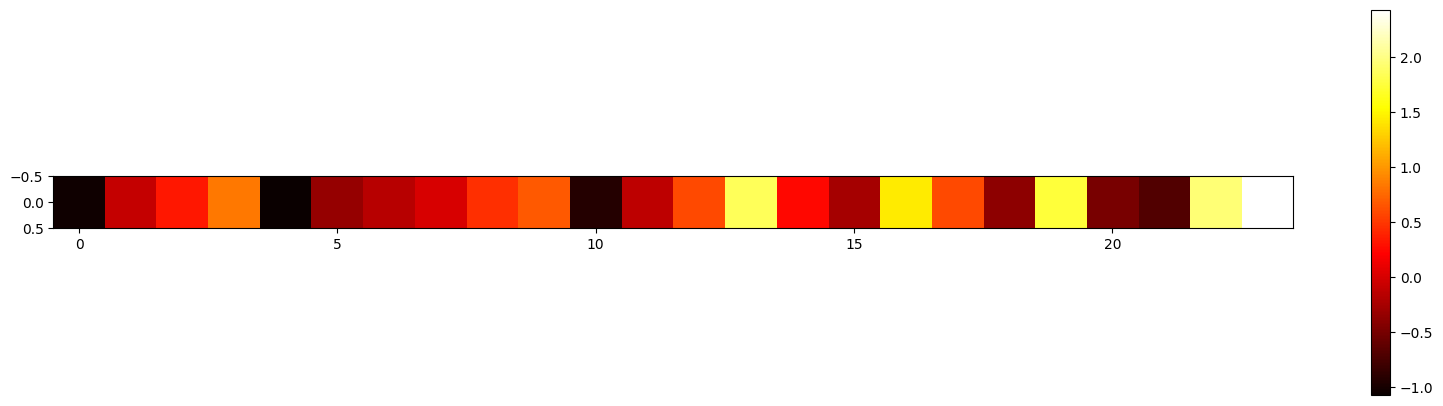

Model Number:  4
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 26ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


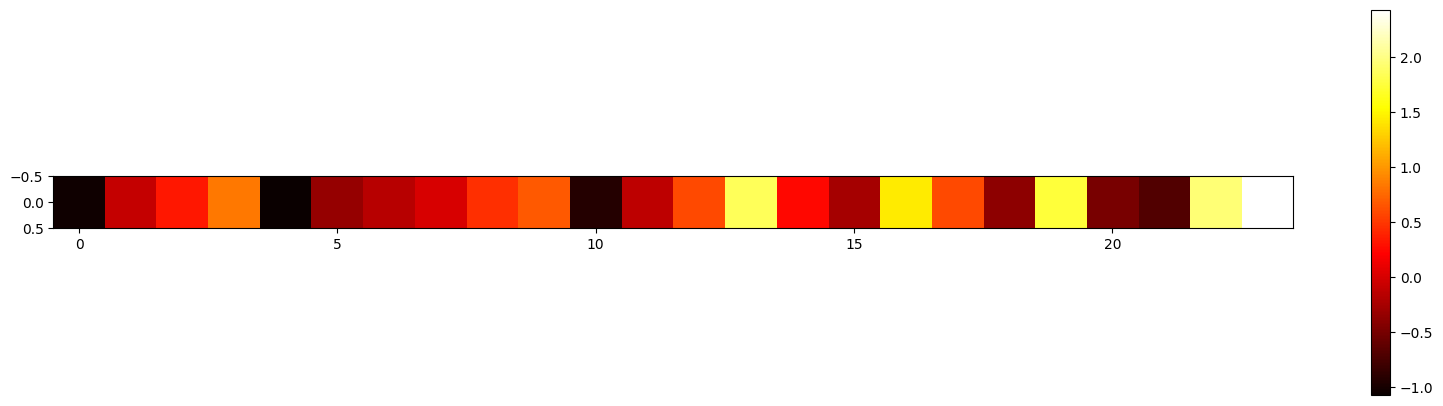

Model Number:  5
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 23ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


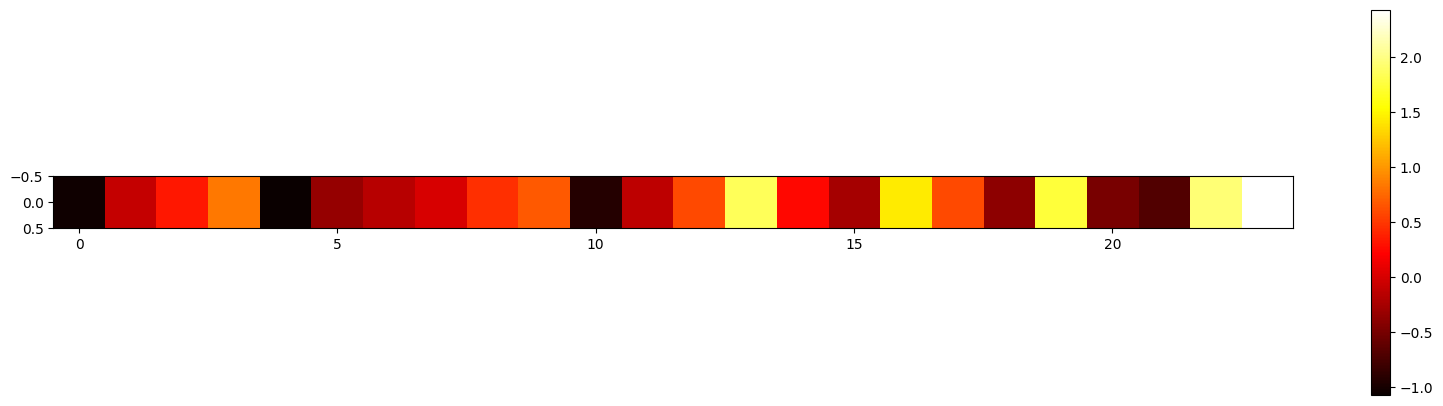

In [191]:
for i, model in enumerate(cnn_gru_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)


Model Number:  1
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 23ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


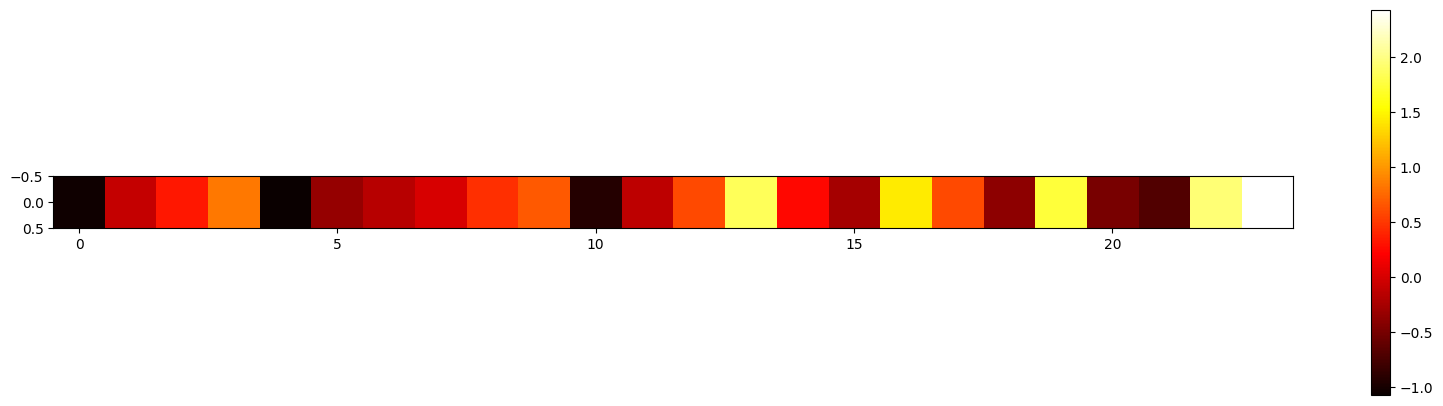

Model Number:  2
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 26ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


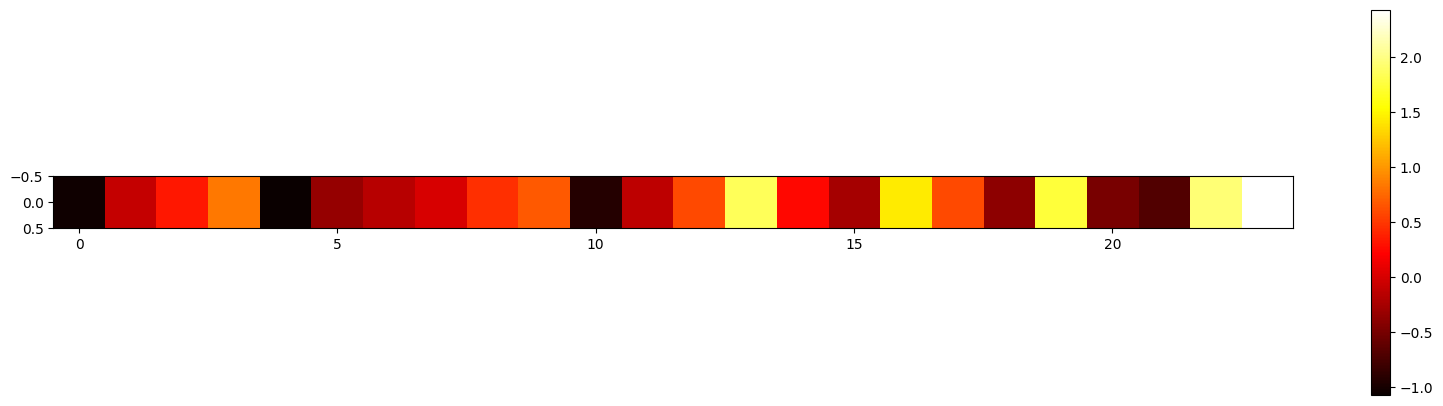

Model Number:  3
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 23ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


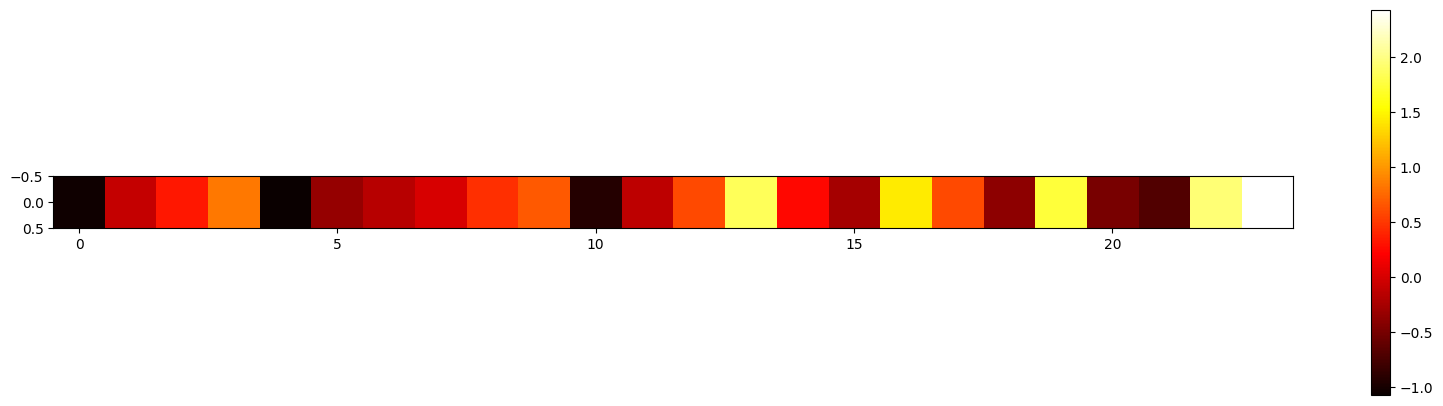

Model Number:  4
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 26ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


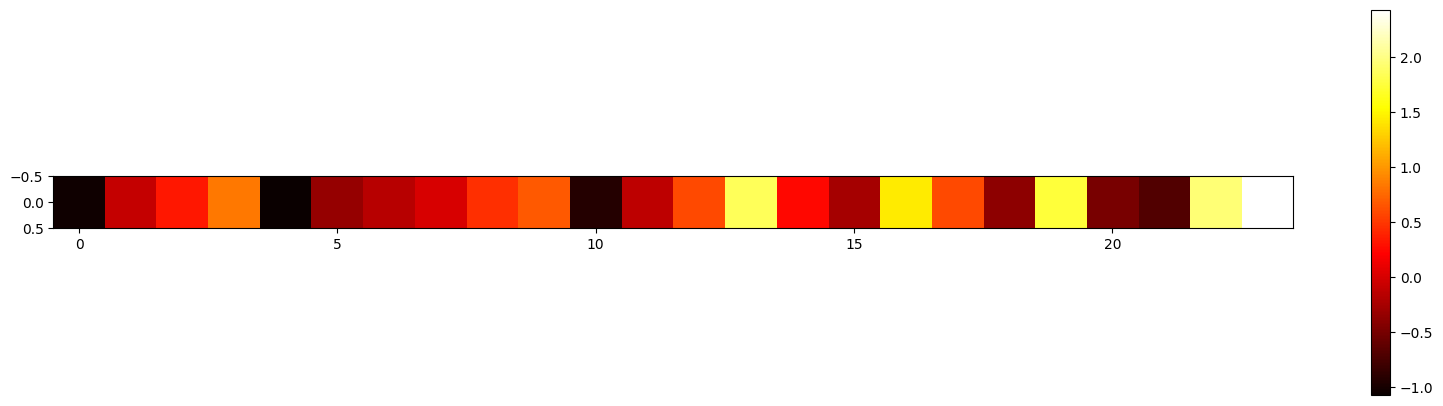

Model Number:  5
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 21ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


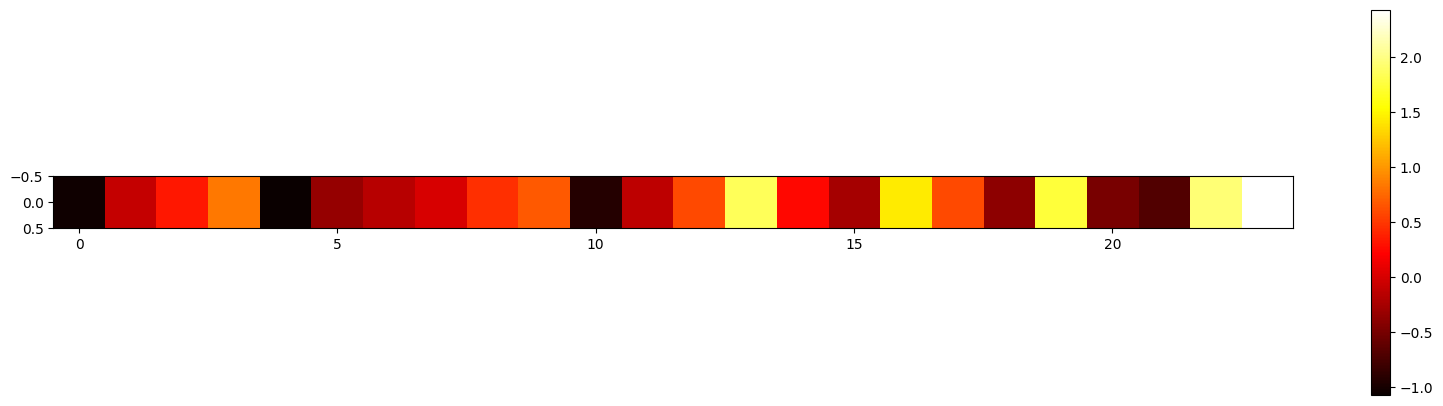

In [192]:
for i, model in enumerate(cnn_lstm_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)

Model Number:  1
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 37ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


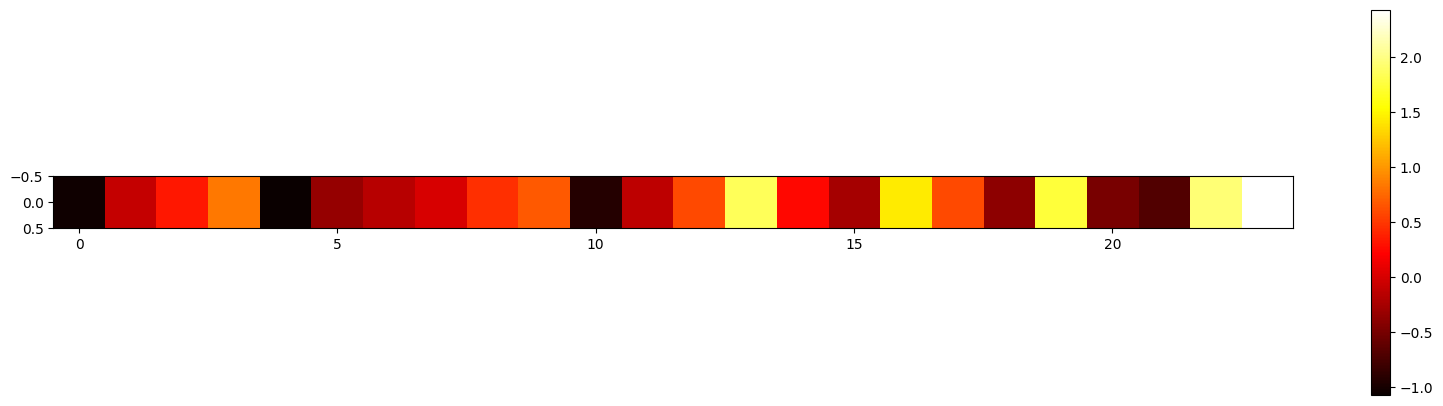

Model Number:  2
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 27ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


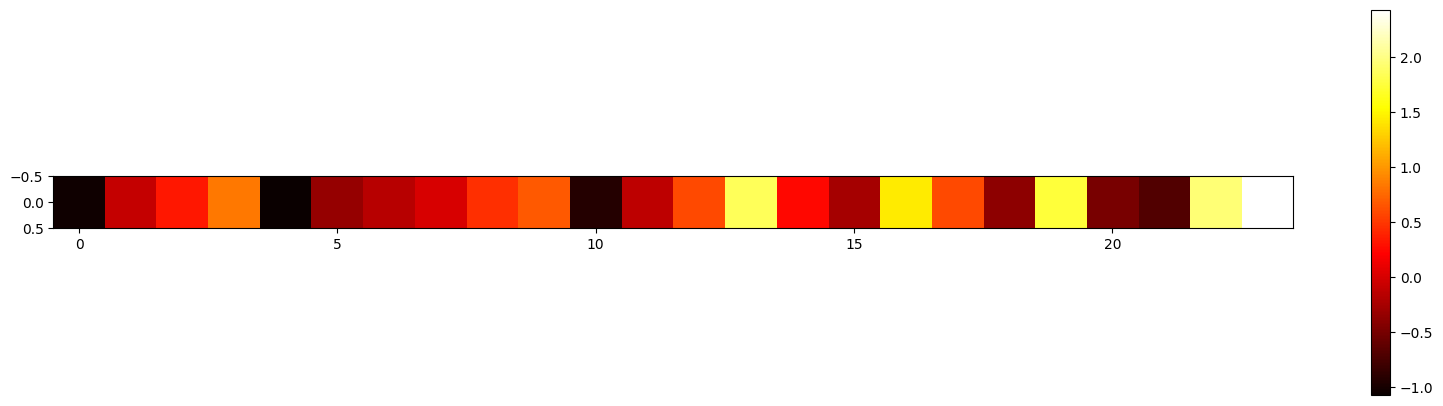

Model Number:  3
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 29ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


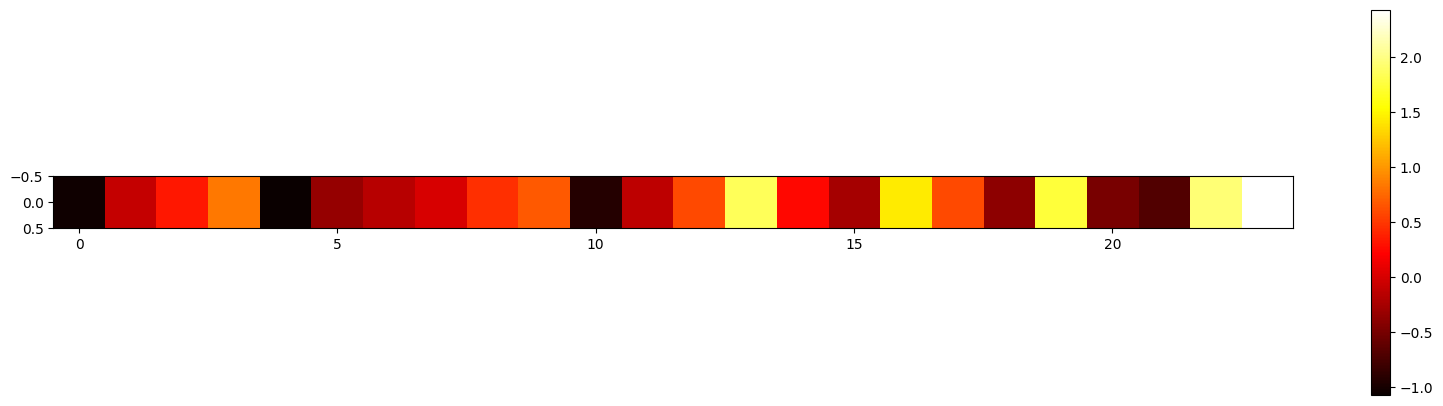

Model Number:  4
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 29ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


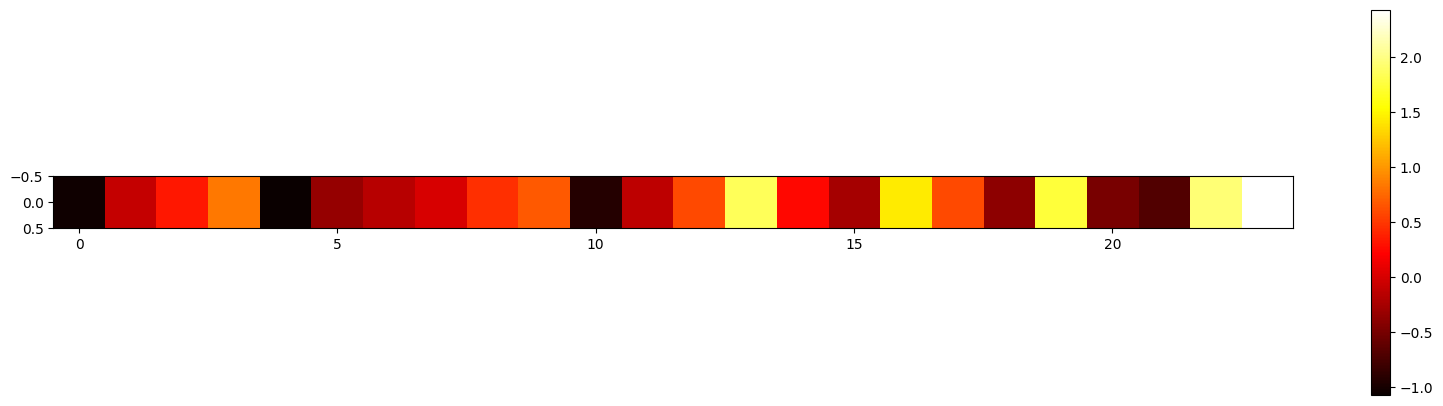

Model Number:  5
Data number:  5952
Real Label:  1
1/1 [==============================] - 0s 28ms/step
Prediction:  1
{23: 2.432119131088257, 22: 1.9416682720184326, 13: 1.8471263647079468, 19: 1.7403236627578735, 16: 1.4409420490264893, 3: 0.8440002799034119, 9: 0.671147346496582, 17: 0.5960861444473267, 12: 0.5935933589935303, 8: 0.4557393193244934, 2: 0.3337128460407257, 14: 0.24834243953227997, 7: 0.001173503347672522, 1: -0.08213014900684357, 11: -0.12366758286952972, 6: -0.16053304076194763, 15: -0.2475440800189972, 5: -0.3367513120174408, 18: -0.37689948081970215, 20: -0.4908898174762726, 21: -0.6887559294700623, 10: -0.9206297993659973, 0: -1.0362894535064697, 4: -1.0659648180007935}
Total relevance: 7.615919254370965
[2, 3, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23]


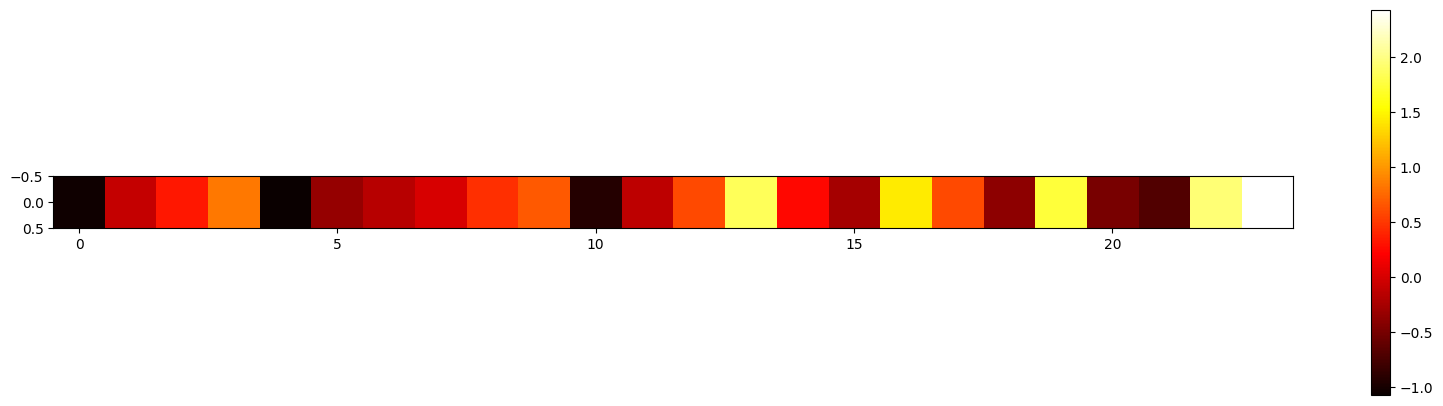

In [193]:
for i, model in enumerate(cnn_attention_gru_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)
